In [ ]:
# Problem Statement: --> Two csv files - X & Y is given
#                    --> X has headers a|b|c & Y has headers- d|e
#                    --> using pandas Create_result(“X.a|X.b|X.c|Y.e” , “X.a=Y.d”)

# Create result.csv with columns from X and Y as passed

In [1]:
!pip install varclushi

In [4]:
import varclushi
dir(varclushi)

['VarClusHi',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'name',
 'varclushi']

In [4]:
import os
os.chdir('E:\\test')
print (os.getcwd())

E:\test


In [6]:
import pandas as pd

In [8]:
x = pd.read_csv('X.csv')
x.head()

,a,b,c
0,5,Ugh,wq
1,2,Kj,asd
2,3,Yu,Dx
3,4,Po,Cv


In [9]:
y = pd.read_csv('y.csv')
y.head()

,d,e
0,3,8i
1,4,Y6
2,2,X09
3,5,m3


In [10]:
z = pd.merge(x, y, left_on="a", right_on="d").drop('d', axis=1)
z

,a,b,c,e
0,5,Ugh,wq,m3
1,2,Kj,asd,X09
2,3,Yu,Dx,8i
3,4,Po,Cv,Y6


In [11]:
z.to_csv('result.csv')

In [45]:
import os
os.chdir('E:\\test')
print (os.getcwd())

E:\test


In [2]:
import pandas as pd
from glob import glob

In [1]:
# combining all files
def combined(X,Y):
   result_obj = pd.merge(X,Y, left_on ='a', right_index=True)
   print(result_obj)
   result_obj.to_csv('result.csv', index= False) 
   

In [5]:
X=pd.read_csv('X.csv')
Y=pd.read_csv('Y.csv', index_col='d')
combined(X,Y)

   a    b    c    e
0  5  Ugh   wq   m3
1  2   Kj  asd  X09
2  3   Yu   Dx   8i
3  4   Po   Cv   Y6


In [ ]:
#Kaggle Days

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install jovian
!pip install wordcloud
!pip install emoji
!pip install seaborn

  Running setup.py bdist_wheel for jovian: started
  Running setup.py bdist_wheel for jovian: finished with status 'done'
  Stored in directory: C:\Users\P RAJ\AppData\Local\pip\Cache\wheels\a9\9d\ea\cc0e501b253a0f1e11dcad7ea61697c3ccbe3121be58a528f4
  Running setup.py bdist_wheel for uuid: started
  Running setup.py bdist_wheel for uuid: finished with status 'done'
  Stored in directory: C:\Users\P RAJ\AppData\Local\pip\Cache\wheels\2a\80\9b\015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built jovian uuid
  Running setup.py bdist_wheel for emoji: started
  Running setup.py bdist_wheel for emoji: finished with status 'done'
  Stored in directory: C:\Users\P RAJ\AppData\Local\pip\Cache\wheels\2a\a9\0a\4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [1]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

In [10]:
!pip install dateparser

In [2]:
import dateparser

In [3]:
import os
os.chdir('E:\\Kaggle_meetup')
print (os.getcwd())

E:\Kaggle_meetup


In [4]:
def rawToDf(file):
    with open(file, 'r', encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
   
    # converting date-time pattern which is of type String to type datetime, format is to be specified for the whole string where the placeholders are extracted by the method    
    try:
        df['date_time'] = df['date_time'].apply(lambda x: dateparser.parse(x))
    except:
        print("oo")
        try:
            df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %I:%M %p - ') #10/20/19, 10:24 pm - 
        except:
            df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y, %I:%M %p - ') #20/10/2019, 10:24 pm -
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [5]:
df = rawToDf('The_World_Is_Flat.txt')

In [6]:
df.head()

,date_time,user,msg
0,2019-07-03 21:51:00,grp_notif,Messages to this group are now secured with en...
1,2019-07-03 21:51:00,grp_notif,"You created group ""Twenty Two"""
2,2019-07-03 21:52:00,Pushkar R,Have your chats here
3,2019-07-03 21:52:00,PGDA_Naveen,Hey what is this 22?
4,2019-07-03 21:52:00,PGDA_Viqnesh,Ooh k cool


In [7]:
df.sample(10)

,date_time,user,msg
1806,2019-08-08 21:17:00,PGDA_Nitin,"Honestly, I remember more about the food he ta..."
2115,2019-09-16 15:54:00,Pushkar R,<Media omitted>
1231,2019-04-25 13:31:00,PGDA_Naomi,Buy anything dude. Normal chocolate flavour.
2192,2019-01-10 18:50:00,Pushkar R,How bout morrow??
1283,2019-04-26 16:41:00,PGDA_Viqnesh,To c the webminar
687,2019-04-04 18:28:00,PGDA_Viqnesh,Blore is best 😍
1425,2019-02-05 20:07:00,PGDA_Naveen,Yup
320,2019-03-20 21:19:00,PGDA_Viqnesh,2k
410,2019-03-28 19:25:00,PGDA_Soumya,https://www.surveymonkey.com/r/WCM2K22
1318,2019-04-26 17:46:00,PGDA_Naomi,It's same as coursera course


In [8]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 3 columns):
date_time    2380 non-null datetime64[ns]
user         2380 non-null object
msg          2380 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 55.9+ KB


In [9]:
df.columns
len(df.columns)

3

In [10]:
df.isna

<bound method DataFrame.isna of                date_time          user  \
0    2019-07-03 21:51:00     grp_notif   
1    2019-07-03 21:51:00     grp_notif   
2    2019-07-03 21:52:00     Pushkar R   
3    2019-07-03 21:52:00   PGDA_Naveen   
4    2019-07-03 21:52:00  PGDA_Viqnesh   
5    2019-07-03 21:53:00   PGDA_Naveen   
6    2019-07-03 21:53:00     Pushkar R   
7    2019-07-03 21:54:00   PGDA_Naveen   
8    2019-07-03 21:54:00     Pushkar R   
9    2019-07-03 21:54:00   PGDA_Naveen   
10   2019-07-03 21:54:00   PGDA_Naveen   
11   2019-07-03 21:54:00   PGDA_Naveen   
12   2019-07-03 21:55:00     Pushkar R   
13   2019-07-03 21:55:00  PGDA_prakash   
14   2019-07-03 21:55:00   PGDA_Naveen   
15   2019-07-03 21:55:00   PGDA_Naveen   
16   2019-07-03 21:56:00  PGDA_prakash   
17   2019-07-03 21:56:00   PGDA_Naveen   
18   2019-07-03 21:56:00   PGDA_Naveen   
19   2019-07-03 21:57:00  PGDA_prakash   
20   2019-07-03 21:57:00  PGDA_prakash   
21   2019-07-03 21:57:00   PGDA_Naveen   
22

In [11]:
df.shape # no. of msgs

(2380, 3)

# No. of images, group notifications and dropping them

In [12]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(119, 3)

In [13]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(23, 3)

In [14]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [15]:
df.reset_index(inplace=True, drop=True)
df.shape

(2238, 3)

In [ ]:
# Who is the most active member of the group. who is the least active. Is it sa,e on weekday weekend?

In [16]:
df.head()

,date_time,user,msg
0,2019-07-03 21:52:00,Pushkar R,Have your chats here
1,2019-07-03 21:52:00,PGDA_Naveen,Hey what is this 22?
2,2019-07-03 21:52:00,PGDA_Viqnesh,Ooh k cool
3,2019-07-03 21:53:00,PGDA_Naveen,Okay bro cool
4,2019-07-03 21:53:00,Pushkar R,Please leave that group strictly for class pur...


In [18]:
# How many time birthday was called in this
df[df.msg.str.contains('birthday')]

,date_time,user,msg


In [19]:
# When was the longest i was inactive
c = 0
for i in df['user']:
    if i != "PGDA_Viqnesh":
        c = c + 1
    else: 
        print(c)
        c = 0 

2
34
2
24
2
0
3
0
0
1
2
2
0
1
1
2
0
2
0
1
19
1
1
1
0
1
3
0
4
6
3
16
0
9
4
0
8
0
0
0
5
0
7
3
1
1
0
2
0
3
19
0
0
1
0
0
6
2
0
1
13
2
1
0
2
2
0
0
0
3
0
0
10
10
1
0
0
2
0
2
0
0
1
0
0
1
2
0
5
3
1
1
0
1
1
1
1
1
0
6
12
0
0
1
0
80
15
0
8
0
31
8
4
15
0
6
25
0
1
0
0
1
1
16
0
0
4
3
0
1
0
1
0
0
0
1
0
0
0
2
1
0
0
0
1
14
0
0
0
2
2
0
0
9
0
0
2
2
0
0
8
0
1
2
1
8
3
0
0
2
3
0
0
1
2
0
2
24
0
0
0
2
16
0
0
1
0
0
0
0
0
4
5
0
0
0
0
1
0
0
0
1
1
1
0
1
2
0
0
1
0
1
0
0
0
0
1
0
0
3
0
0
3
1
0
0
0
0
0
1
0
0
0
2
0
1
1
0
1
1
2
1
0
2
0
1
4
0
0
2
0
0
0
3
0
2
1
0
0
0
0
5
0
1
0
0
0
0
1
0
2
8
0
0
0
21
0
1
0
0
0
0
1
1
0
0
0
1
5
0
1
0
0
6
0
2
0
6
1
1
0
0
31
0
0
23
26
32
1
6
1
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
4
0
2
1
0
1
4
3
0
1
7
0
0
3
0
3
14
7
9
0
0
3
24
0
23
0
1
0
1
41
0
0
1
0
0
0
0
1
3
1
1
0
2
1
8
0
25
0
9
0
1
0
16
0
0
18
0
10
2
23
0
0
11
0
1
0
1
0
0
52
0
0
1
1
3
54
0
0
0
9
0
0
1
2
13
0
0
3
0
0
0
0
4
0
1
0
1
2
0
1
0
0
1
0
1
2
0
2
0
1
1
2
0
0
2
9
1
0
0
4
1
1
1
1
3
0
65
0
1
0
1
0
2
0
2
2
1
2
1
2
0
1
2
0
7
10
0
37
2
0
0
1
0

In [20]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Pushkar R           568
PGDA_Viqnesh        532
PGDA_Rasmita        307
PGDA_Nitin          307
PGDA_Naveen         241
PGDA_Naomi           79
PGDA_Rashmi          70
PGDA_Soumya          45
PGDA_Mahalakshmi     39
PGDA_Manaswini       15
PGDA_prakash         12
PGDA_Sirohi           7
PGDA_Naveen Raj       6
PGDA_Krishna          5
PGDA_ Praneeth        5
Name: msg, dtype: int64

In [21]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 


#Note: we could record the functionlity of date time and use it every where

In [22]:
df.weekday.value_counts(sort=True)

Monday       633
Friday       397
Tuesday      362
Thursday     358
Wednesday    306
Saturday     107
Sunday        75
Name: weekday, dtype: int64

In [26]:
df[df.weekday=="Sunday"]['user'].value_counts()

Pushkar R         24
PGDA_Naveen       14
PGDA_Viqnesh       9
PGDA_Rasmita       9
PGDA_Nitin         9
PGDA_Soumya        3
PGDA_Naomi         2
PGDA_Manaswini     2
PGDA_Rashmi        2
PGDA_Krishna       1
Name: user, dtype: int64

In [27]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [73]:
# Count of all the emoticons that i have used till date.

In [28]:
df.head()

,date_time,user,msg,weekday,is_weekend
0,2019-07-03 21:52:00,Pushkar R,Have your chats here,Wednesday,False
1,2019-07-03 21:52:00,PGDA_Naveen,Hey what is this 22?,Wednesday,False
2,2019-07-03 21:52:00,PGDA_Viqnesh,Ooh k cool,Wednesday,False
3,2019-07-03 21:53:00,PGDA_Naveen,Okay bro cool,Wednesday,False
4,2019-07-03 21:53:00,Pushkar R,Please leave that group strictly for class pur...,Wednesday,False


In [29]:
df["user"].unique()

array(['Pushkar R', 'PGDA_Naveen', 'PGDA_Viqnesh', 'PGDA_prakash',
       'PGDA_Rasmita', 'PGDA_Rashmi', 'PGDA_Nitin', 'PGDA_Mahalakshmi',
       'PGDA_Naomi', 'PGDA_Manaswini', 'PGDA_Krishna', 'PGDA_Soumya',
       'PGDA_ Praneeth', 'PGDA_Naveen Raj', 'PGDA_Sirohi'], dtype=object)

In [30]:
me ='Pushkar R'

In [31]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [32]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

😂 - 161
😀 - 20
🤣 - 17
😡 - 14
😭 - 13
🙂 - 11
😄 - 10
😃 - 8
🙃 - 8
😆 - 8


In [33]:
# What can my activity say about my sleep cycle?

def to_hour(val):
    return val.hour

In [34]:
df['hour'] = df['date_time'].apply(to_hour)

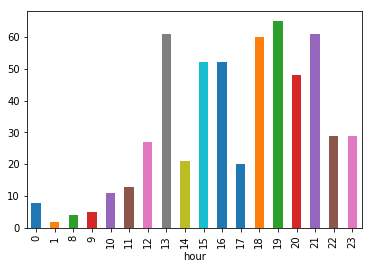

In [35]:
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

In [82]:
# What is the difference in Weekend vs Weekday usage pattern?
# How many words do I type on average on weekday vs weekend?

In [36]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Pushkar R           568
PGDA_Viqnesh        532
PGDA_Rasmita        307
PGDA_Nitin          307
PGDA_Naveen         241
PGDA_Naomi           79
PGDA_Rashmi          70
PGDA_Soumya          45
PGDA_Mahalakshmi     39
PGDA_Manaswini       15
PGDA_prakash         12
PGDA_Sirohi           7
PGDA_Naveen Raj       6
PGDA_ Praneeth        5
PGDA_Krishna          5
Name: user, dtype: int64

In [37]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Pushkar R', 'PGDA_Viqnesh', 'PGDA_Rasmita', 'PGDA_Nitin', 'PGDA_Naveen']

In [38]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,weekday,is_weekend,hour
0,2019-07-03 21:52:00,Pushkar R,Have your chats here,Wednesday,False,21
1,2019-07-03 21:52:00,PGDA_Naveen,Hey what is this 22?,Wednesday,False,21
2,2019-07-03 21:52:00,PGDA_Viqnesh,Ooh k cool,Wednesday,False,21
3,2019-07-03 21:53:00,PGDA_Naveen,Okay bro cool,Wednesday,False,21
4,2019-07-03 21:53:00,Pushkar R,Please leave that group strictly for class pur...,Wednesday,False,21


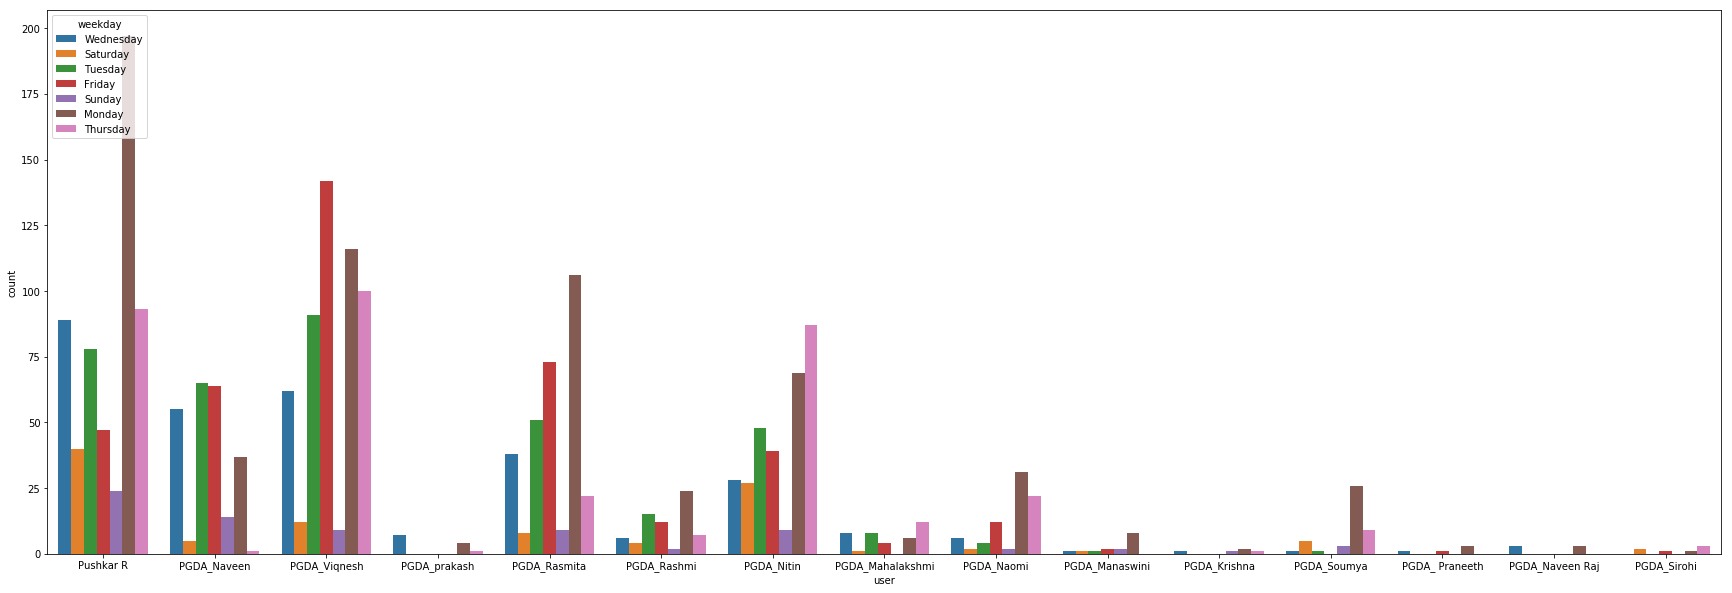

In [39]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [40]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

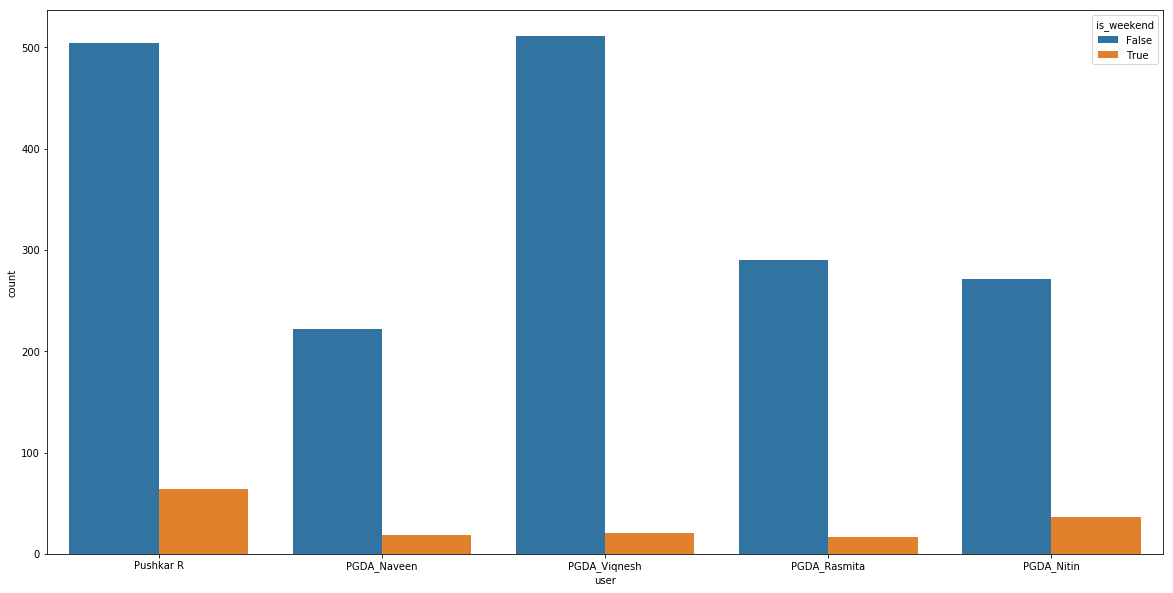

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [42]:
def word_count(val):
    return len(val.split())

In [43]:
df['no_of_words'] = df['msg'].apply(word_count)

In [44]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

In [45]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

10750

In [46]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

1051

In [47]:
total_words_weekday/5

2150.0

In [48]:
total_words_weekend/2

525.5

In [49]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Pushkar R           3769
PGDA_Viqnesh        2362
PGDA_Nitin          2076
PGDA_Rasmita        1500
PGDA_Naveen          922
PGDA_Rashmi          310
PGDA_Mahalakshmi     243
PGDA_Naomi           222
PGDA_Soumya          160
PGDA_prakash          76
PGDA_Manaswini        62
PGDA_ Praneeth        34
PGDA_Naveen Raj       24
PGDA_Krishna          22
PGDA_Sirohi           19
Name: no_of_words, dtype: int64

In [50]:
(df.groupby('user')['no_of_words'].sum()/df.groupby('user').size()).sort_values(ascending=False)

user
PGDA_ Praneeth      6.800000
PGDA_Nitin          6.762215
Pushkar R           6.635563
PGDA_prakash        6.333333
PGDA_Mahalakshmi    6.230769
PGDA_Rasmita        4.885993
PGDA_Viqnesh        4.439850
PGDA_Rashmi         4.428571
PGDA_Krishna        4.400000
PGDA_Manaswini      4.133333
PGDA_Naveen Raj     4.000000
PGDA_Naveen         3.825726
PGDA_Soumya         3.555556
PGDA_Naomi          2.810127
PGDA_Sirohi         2.714286
dtype: float64

In [51]:
(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

user
PGDA_Nitin      6.762215
Pushkar R       6.635563
PGDA_Rasmita    4.885993
PGDA_Viqnesh    4.439850
PGDA_Naveen     3.825726
dtype: float64

In [52]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user          is_weekend
PGDA_Naveen   False         3.788288
              True          4.263158
PGDA_Nitin    False         6.867159
              True          5.972222
PGDA_Rasmita  False         4.789655
              True          6.529412
PGDA_Viqnesh  False         4.393346
              True          5.571429
Pushkar R     False         6.603175
              True          6.890625
dtype: float64

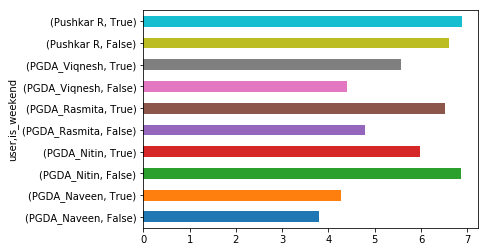

In [53]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

In [54]:
# Most Usage - Time of Day
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,NaN,1.0,NaN,NaN,2.0,NaN,16.0
1,NaN,NaN,NaN,2.0,1.0,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN
6,NaN,10.0,NaN,1.0,NaN,NaN,NaN
7,NaN,NaN,1.0,4.0,NaN,2.0,7.0


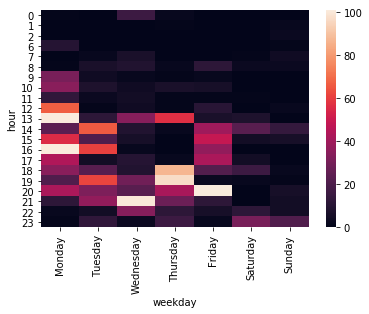

In [55]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

In [56]:
# In any group, do I have any inclination towards responding to someone?

my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[   0    4    6   10   21   28   32   34  100  102  105  106  108  109
  112  116  117  119  121  123  133  134  136  138  141  143  145  149
  150  151  154  162  163  167  169  170  171  172  173  174  198  199
  203  204  205  206  208  210  214  220  228  231  233  236  238  239
  240  244  245  249  253  254  256  258  260  261  267  270  272  273
  275  280  281  286  287  289  296  303  305  306  309  312  314  315
  317  318  319  321  323  327  328  331  332  336  340  342  343  349
  350  352  354  356  376  388  398  400  402  404  405  406  409  410
  411  412  413  414  415  419  434  436  439  440  441  443  444  446
  450  454  458  460  462  464  470  474  476  490  499  506  509  514
  515  518  520  522  528  530  533  535  542  544  548  555  560  568
  571  572  575  577  579  581  584  586  587  590  592  593  596  598
  602  606  608  610  613  614  616  619  621  623  629  630  631  632
  634  671  675  681  684  688  690  692  695  700  721  723  725  726
  729 

In [57]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)


[  -1    3    5    9   20   27   31   33   99  101  104  105  107  108
  111  115  116  118  120  122  132  133  135  137  140  142  144  148
  149  150  153  161  162  166  168  169  170  171  172  173  197  198
  202  203  204  205  207  209  213  219  227  230  232  235  237  238
  239  243  244  248  252  253  255  257  259  260  266  269  271  272
  274  279  280  285  286  288  295  302  304  305  308  311  313  314
  316  317  318  320  322  326  327  330  331  335  339  341  342  348
  349  351  353  355  375  387  397  399  401  403  404  405  408  409
  410  411  412  413  414  418  433  435  438  439  440  442  443  445
  449  453  457  459  461  463  469  473  475  489  498  505  508  513
  514  517  519  521  527  529  532  534  541  543  547  554  559  567
  570  571  574  576  578  580  583  585  586  589  591  592  595  597
  601  605  607  609  612  613  615  618  620  622  628  629  630  631
  633  670  674  680  683  687  689  691  694  699  720  722  724  725
  728 

In [58]:
prev_msgs_index = np.delete(prev_msgs_index, 0)
prev_msgs_index

array([   3,    5,    9,   20,   27,   31,   33,   99,  101,  104,  105,
        107,  108,  111,  115,  116,  118,  120,  122,  132,  133,  135,
        137,  140,  142,  144,  148,  149,  150,  153,  161,  162,  166,
        168,  169,  170,  171,  172,  173,  197,  198,  202,  203,  204,
        205,  207,  209,  213,  219,  227,  230,  232,  235,  237,  238,
        239,  243,  244,  248,  252,  253,  255,  257,  259,  260,  266,
        269,  271,  272,  274,  279,  280,  285,  286,  288,  295,  302,
        304,  305,  308,  311,  313,  314,  316,  317,  318,  320,  322,
        326,  327,  330,  331,  335,  339,  341,  342,  348,  349,  351,
        353,  355,  375,  387,  397,  399,  401,  403,  404,  405,  408,
        409,  410,  411,  412,  413,  414,  418,  433,  435,  438,  439,
        440,  442,  443,  445,  449,  453,  457,  459,  461,  463,  469,
        473,  475,  489,  498,  505,  508,  513,  514,  517,  519,  521,
        527,  529,  532,  534,  541,  543,  547,  5

In [59]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(567, 7)

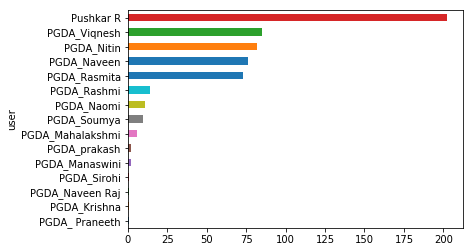

In [60]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

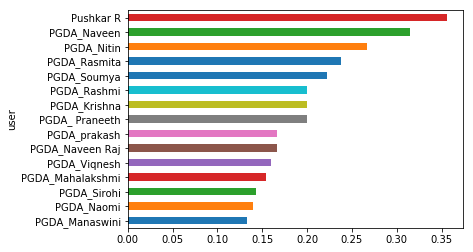

In [61]:
(df_replies.groupby(["user"])["msg"].size()/df.groupby(["user"])["msg"].size()).sort_values().plot(kind='barh')

In [62]:
# Which are the most common words?
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


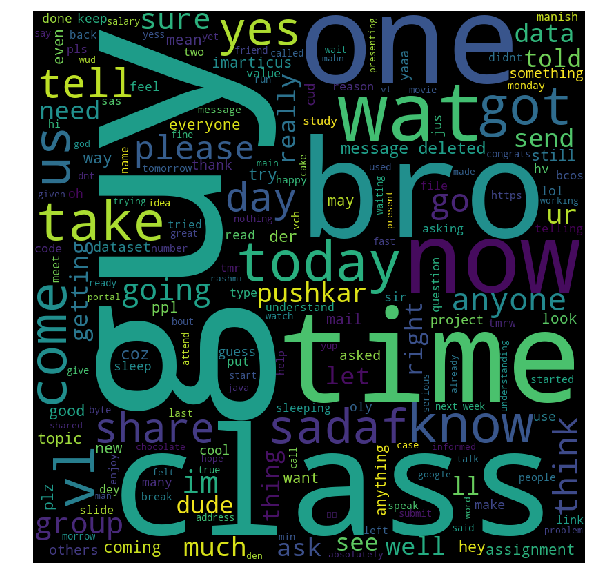

In [63]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 